In [4]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [5]:
%matplotlib inline

In [6]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [7]:
import os
os.listdir('names')

['yob1919.txt',
 'yob1922.txt',
 'yob1892.txt',
 'yob1906.txt',
 'yob1904.txt',
 'yob1918.txt',
 'yob1943.txt',
 'yob1961.txt',
 'yob1938.txt',
 'yob2011.txt',
 'yob2004.txt',
 'yob1973.txt',
 'yob1940.txt',
 'yob1984.txt',
 'yob1947.txt',
 'yob1981.txt',
 'yob1902.txt',
 'yob1900.txt',
 'yob1994.txt',
 'yob1956.txt',
 'yob1985.txt',
 'yob1975.txt',
 'yob2002.txt',
 'yob1882.txt',
 'yob1953.txt',
 'yob1942.txt',
 'yob1941.txt',
 'yob1925.txt',
 'yob1932.txt',
 'yob1905.txt',
 'yob1931.txt',
 'yob2006.txt',
 'yob1911.txt',
 'yob1976.txt',
 'yob1924.txt',
 'yob1977.txt',
 'yob1992.txt',
 'yob1936.txt',
 'yob2003.txt',
 'yob2012.txt',
 'yob1969.txt',
 'yob2008.txt',
 'yob1895.txt',
 'yob1903.txt',
 'yob1955.txt',
 'yob1986.txt',
 'yob1979.txt',
 'yob1950.txt',
 'yob1948.txt',
 'yob1987.txt',
 'yob1962.txt',
 'yob1914.txt',
 'yob1939.txt',
 'yob1995.txt',
 'yob1997.txt',
 'yob1915.txt',
 'yob2005.txt',
 'yob2007.txt',
 'yob1944.txt',
 'yob1982.txt',
 'yob1890.txt',
 'yob1952.txt',
 'yob201

In [8]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [9]:
names2011 = pd.read_csv('names/yob2011.txt')

In [10]:
names2011.head()

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


In [11]:
names2011 = pd.read_csv('names/yob2011.txt',names=['name','sex','number'])

In [12]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [13]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [14]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [15]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [16]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [17]:
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [18]:
allyears_indexed.loc['F','Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2010,2862
2011,2701
2012,2565


In [19]:
def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]

    pp.plot(data.index,data.values)


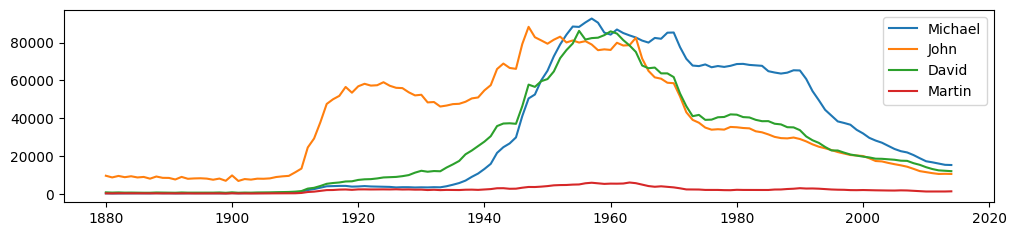

In [20]:
pp.figure(figsize=(12,2.5))

names = ['Michael','John','David','Martin']

for name in names:
    plotname('M',name)

pp.legend(names)

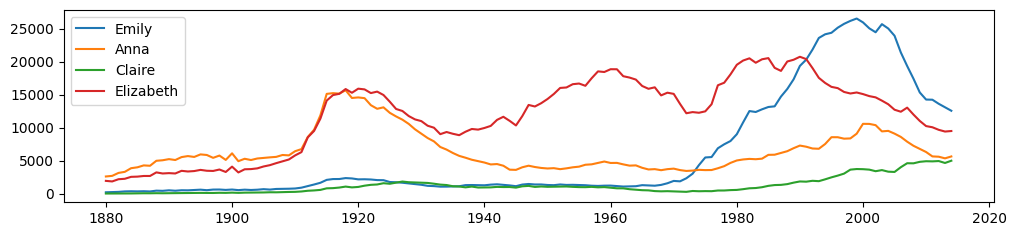

In [21]:
pp.figure(figsize=(12,2.5))

names = ['Emily','Anna','Claire','Elizabeth']

for name in names:
    plotname('F',name)

pp.legend(names)

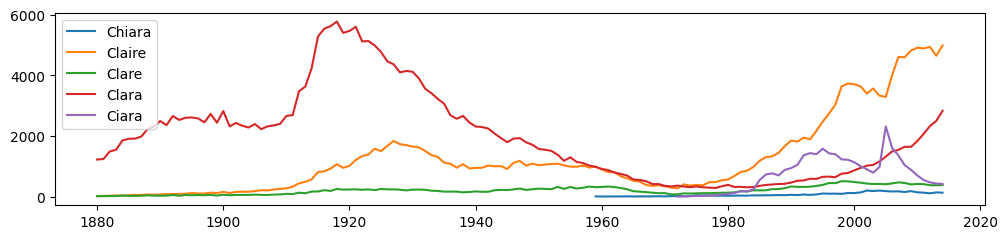

In [22]:
pp.figure(figsize=(12,2.5))

names = ['Chiara','Claire','Clare','Clara','Ciara']

for name in names:
    plotname('F',name)

pp.legend(names)

In [23]:
allyears_indexed.loc['F'].loc[names].head()

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12

In [24]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).head()

number                           
name Chiara Claire Clare   Clara Ciara
year                                  
1880    NaN   21.0  15.0  1226.0   NaN
1881    NaN   23.0  20.0  1242.0   NaN
1882    NaN   30.0  21.0  1490.0   NaN
1883    NaN   38.0  22.0  1548.0   NaN
1884    NaN   33.0  38.0  1852.0   NaN

In [25]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                           
name Chiara Claire Clare   Clara Ciara
year                                  
1880    0.0   21.0  15.0  1226.0   0.0
1881    0.0   23.0  20.0  1242.0   0.0
1882    0.0   30.0  21.0  1490.0   0.0
1883    0.0   38.0  22.0  1548.0   0.0
1884    0.0   33.0  38.0  1852.0   0.0

In [26]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

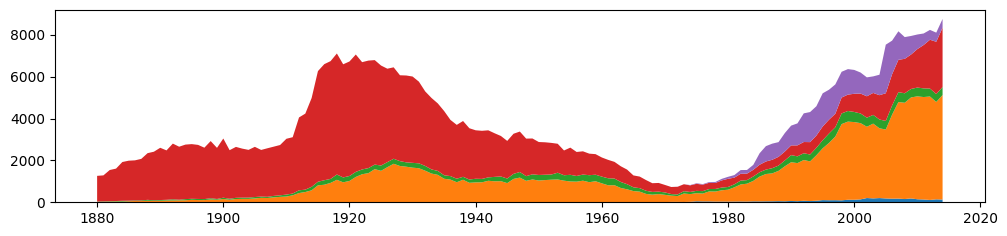

In [27]:
pp.figure(figsize=(12,2.5))

pp.stackplot(variants.index,variants.values.T)

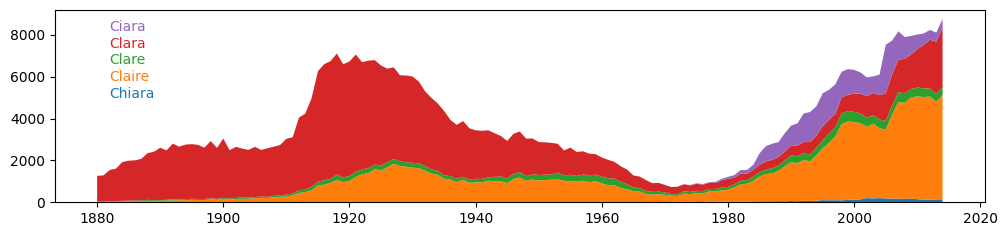

In [28]:
pp.figure(figsize=(12,2.5))

palette = seaborn.color_palette()
pp.stackplot(variants.index,variants.values.T,colors=palette)

for i,name in enumerate(names):
    pp.text(1882,5000 + 800*i,name,color=palette[i])

In [29]:
allyears_indexed.loc['M',:,2008].sort_values('number',ascending=False).head()

,number
name,
Jacob,22568
Michael,20590
Ethan,20196
Joshua,19186
Daniel,18985


In [30]:
pop2008 = allyears_indexed.loc['M',:,2008].sort_values('number',ascending=False).head()

In [31]:
pop2008.reset_index().drop(['number'],axis=1).head()

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [32]:
def topten(sex,year):
    simple = allyears_indexed.loc[sex,:,year].sort_values('number',ascending=False).reset_index()
    simple = simple.drop(['number'],axis=1).head(10)

    simple.columns = [year]
    simple.index = simple.index + 1

    return simple

In [33]:
topten('M',2009)

,2009
1,Jacob
2,Ethan
3,Michael
4,Alexander
5,William
6,Joshua
7,Daniel
8,Jayden
9,Noah
10,Christopher


In [34]:
def toptens(sex,year0,year1):
    years = [topten(sex,year) for year in range(year0,year1+1)]

    return years[0].join(years[1:])

In [35]:
toptens('M',2000,2010)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel,William,William
6,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander
7,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William,Daniel,Noah
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony,Jayden,Daniel
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony


In [36]:
toptens('F',1985,1995)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
1,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica
2,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley
3,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily
4,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha
5,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah
6,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor
7,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah
8,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany
9,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda
10,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth


In [37]:
toptens('F',1985,1995).stack().head()

1  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
dtype: object

In [38]:
toptens('F',1985,1995).stack().value_counts()

Jessica      11
Ashley       11
Amanda       11
Sarah        11
Elizabeth    11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Taylor        3
Heather       3
Megan         3
Lauren        2
Hannah        1
dtype: int64

In [39]:
popular = toptens('F',1985,1995).stack().value_counts().index[:6]

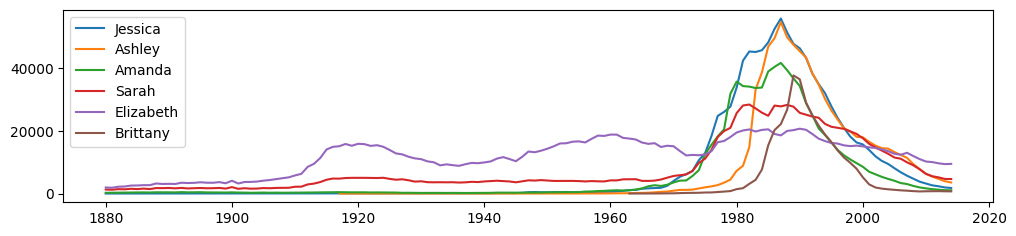

In [40]:
pp.figure(figsize=(12,2.5))

for name in popular:
    plotname('F',name)

pp.legend(popular)

In [41]:
totals_bysex = allyears.groupby(['sex','name']).number.sum()
totals_bysex = totals_bysex.unstack(['sex'])
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [42]:
totals_both = totals_bysex.sum(axis=1)
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [43]:
ratio = totals_bysex.F / totals_bysex.M
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [44]:
totals_both = totals_both[(ratio>0.25)&(ratio<4)].sort_values(ascending=False).head(10)
totals_both

name
Willie    593888.0
Jordan    479434.0
Taylor    416096.0
Leslie    376587.0
Jamie     350262.0
Angel     301425.0
Lee       291691.0
Jessie    274931.0
Marion    259549.0
Dana      243517.0
dtype: float64

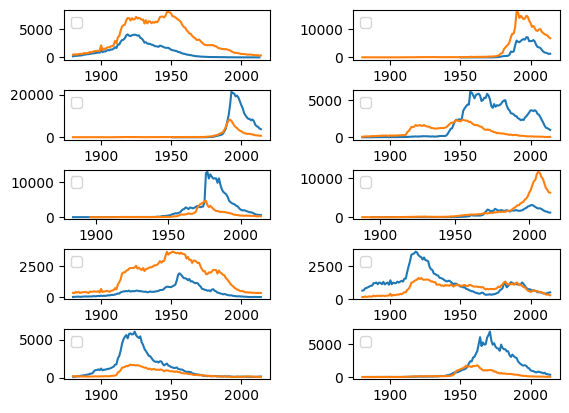

In [68]:
name_list = totals_both[0:10].keys()
fig = pp.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(1,11):
  flegend = name_list[i-1]
  mlegend = name_list[i-1]
  ax = fig.add_subplot(5, 2, i)
  pp.legend([mlegend+' M',flegend+' F'], loc='upper left')
  plotname('F', name_list[i-1])
  plotname('M', name_list[i-1])
